Import the data and get a training/testing set.

In [1]:
from data_processing import import_and_clean_train, one_hot_encoding, label_encoding


train_x_le, test_x_le, train_y_le, test_y_le, label_dict = import_and_clean_train('train', label_encoding)
train_x_ohe, test_x_ohe, train_y_ohe, test_y_ohe = import_and_clean_train('train', one_hot_encoding)


Import all the regresssion types. And make models

In [2]:
from sklearn import linear_model

# Linear regression
lin_reg = linear_model.LinearRegression()
lin_reg.fit(train_x_ohe, train_y_ohe)

# Lasso model
lasso_reg = linear_model.Lasso(max_iter=100000, tol=0.00001)
lasso_reg.fit(train_x_ohe, train_y_ohe)

# LARS Lasso model
lars_lasso_reg = linear_model.LassoLars(max_iter=75)
lars_lasso_reg.fit(train_x_ohe, train_y_ohe)

# Multi task lasso
elastic_reg = linear_model.ElasticNet(max_iter=100000, tol=0.1)
elastic_reg.fit(train_x_ohe, train_y_ohe)

ElasticNet(max_iter=100000, tol=0.1)

Making predictions with the models.

In [3]:
# Calculate average deviation
def dev(y, y_hat):
    tot = 0
    for i in range(len(y)):
        tot += abs(y[i]-y_hat[i])
    return tot / len(y)

In [4]:
# Linear regression prediction
lin_reg_test = lin_reg.predict(test_x_ohe)
lin_reg_train = lin_reg.predict(train_x_ohe)

print(f'Avg deviation of linear regression on test set: {dev(test_y_ohe, lin_reg_test)}')
print(f'Avg deviation of linear regression on train set: {dev(train_y_ohe, lin_reg_train)}\n')

# Lasso regression prediction
lasso_reg_test = lasso_reg.predict(test_x_ohe)
lasso_reg_train = lasso_reg.predict(train_x_ohe)

print(f'Avg deviation of lasso regression on test set: {dev(test_y_ohe, lasso_reg_test)}')
print(f'Avg deviation of lasso regression on train set: {dev(train_y_ohe, lasso_reg_train)}\n')

# Lars lasso regression prediction
lars_lasso_reg_test = lars_lasso_reg.predict(test_x_ohe)
lars_lasso_reg_train = lars_lasso_reg.predict(train_x_ohe)

print(f'Avg deviation of LARS lasso regression on test set: {dev(test_y_ohe, lars_lasso_reg_test)}')
print(f'Avg deviation of LARS lasso regression on train set: {dev(train_y_ohe, lars_lasso_reg_train)}\n')

# Elastic regression prediction
elastic_reg_test = elastic_reg.predict(test_x_ohe)
elastic_reg_train = elastic_reg.predict(train_x_ohe)

print(f'Avg deviation of elastic regression on test set: {dev(test_y_ohe, elastic_reg_test)}')
print(f'Avg deviation of elastic regression on train set: {dev(train_y_ohe, elastic_reg_train)}')



Avg deviation of linear regression on test set: 17490.33246539653
Avg deviation of linear regression on train set: 13262.67416835545

Avg deviation of lasso regression on test set: 17075.79140248367
Avg deviation of lasso regression on train set: 13270.732323930322

Avg deviation of LARS lasso regression on test set: 15391.770826783792
Avg deviation of LARS lasso regression on train set: 15009.020291392268

Avg deviation of elastic regression on test set: 17206.334680763463
Avg deviation of elastic regression on train set: 19524.464420928784


Visualizing the predictions


In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

x_points = np.linspace(0, len(test_y_le), len(test_y_le))


Visualizing linear

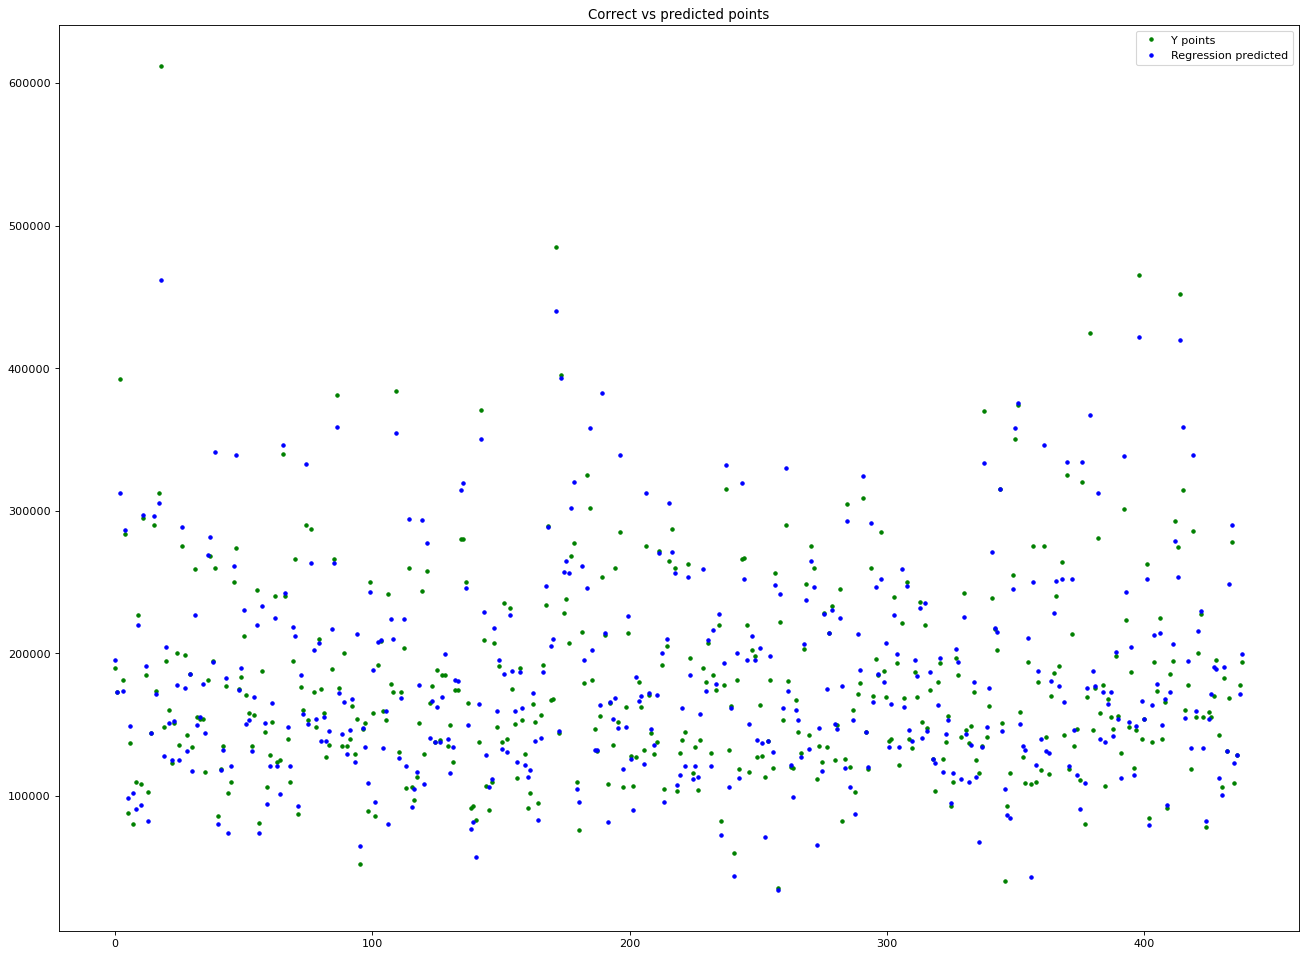

In [7]:
figure(figsize=(20, 15), dpi=80)
plt.title('Correct vs predicted points')
plt.plot(x_points, test_y_ohe, "g.", label='Y points')
plt.plot(x_points, lin_reg_test, "b.", label='Regression predicted')
plt.legend()
plt.show()

Visualizing Lasso

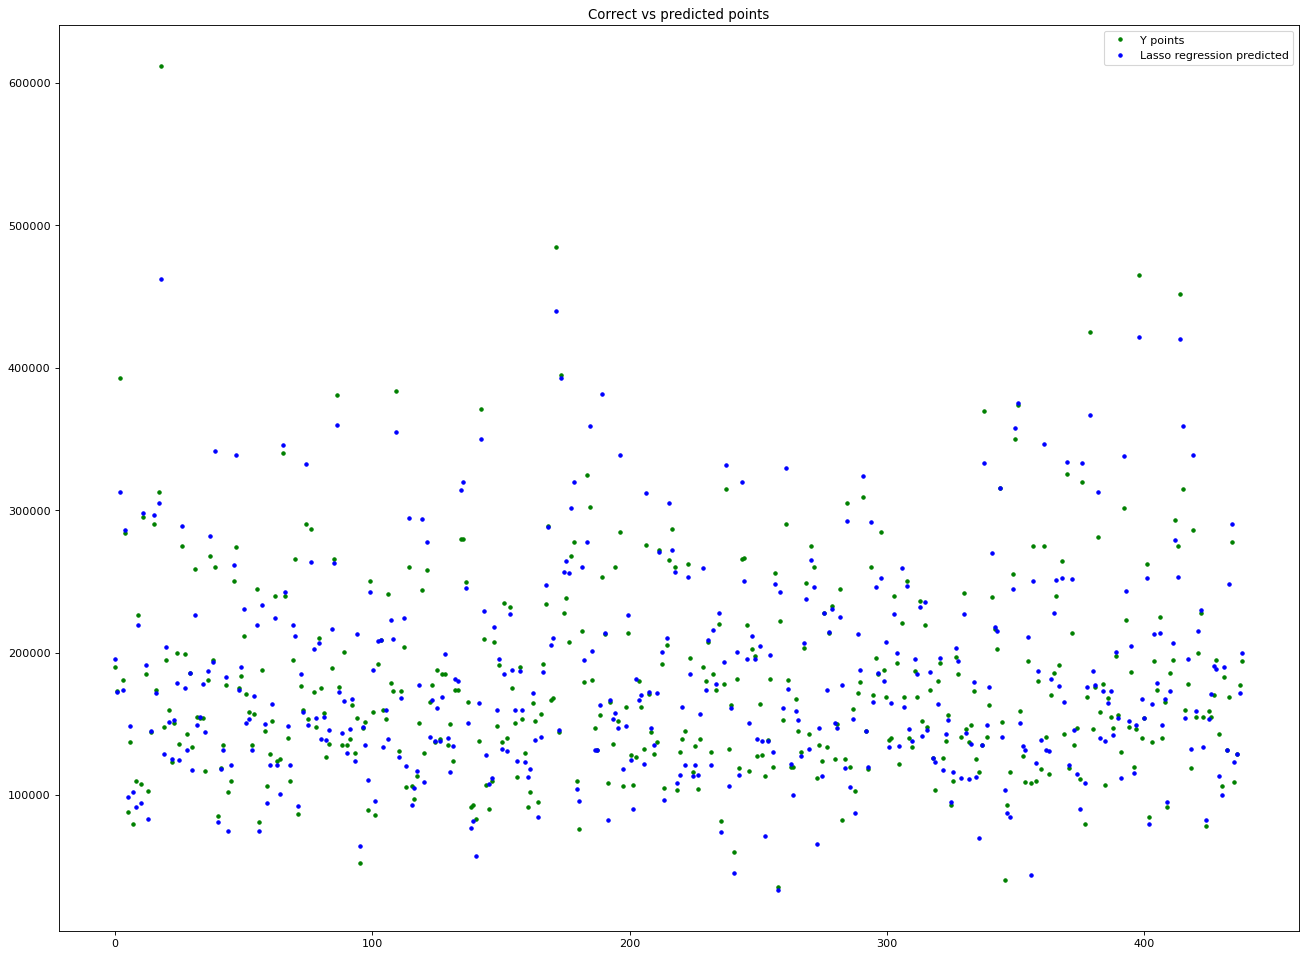

In [8]:
figure(figsize=(20, 15), dpi=80)
plt.title('Correct vs predicted points')
plt.plot(x_points, test_y_ohe, "g.", label='Y points')
plt.plot(x_points, lasso_reg_test, "b.", label='Lasso regression predicted')
plt.legend()
plt.show()

Visualizing LARS Lasso


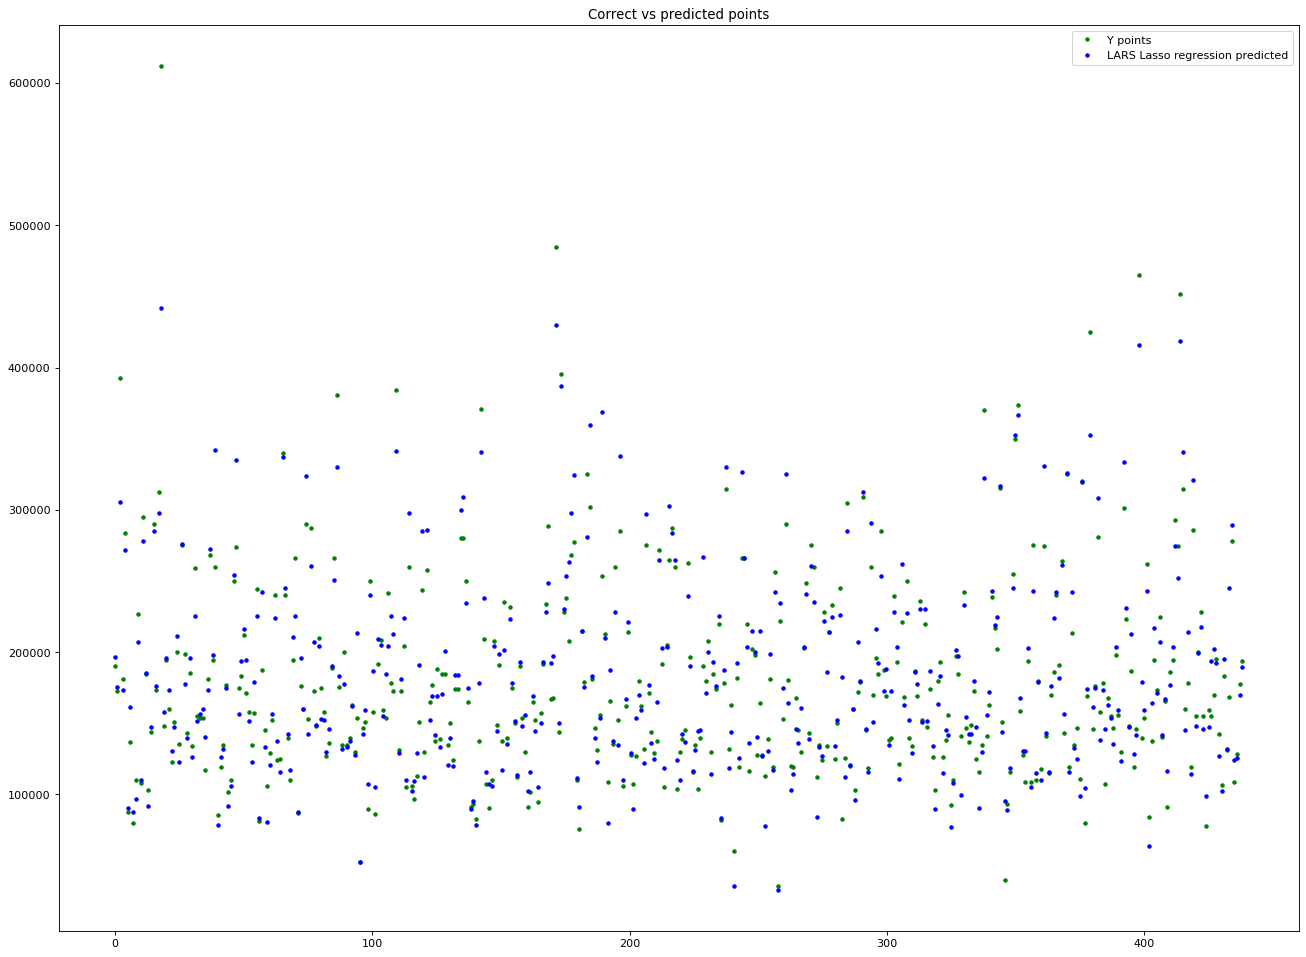

In [9]:
figure(figsize=(20, 15), dpi=80)
plt.title('Correct vs predicted points')
plt.plot(x_points, test_y_ohe, "g.", label='Y points')
plt.plot(x_points, lars_lasso_reg_test, "b.", label='LARS Lasso regression predicted')
plt.legend()
plt.show()

Visualizing Elastic

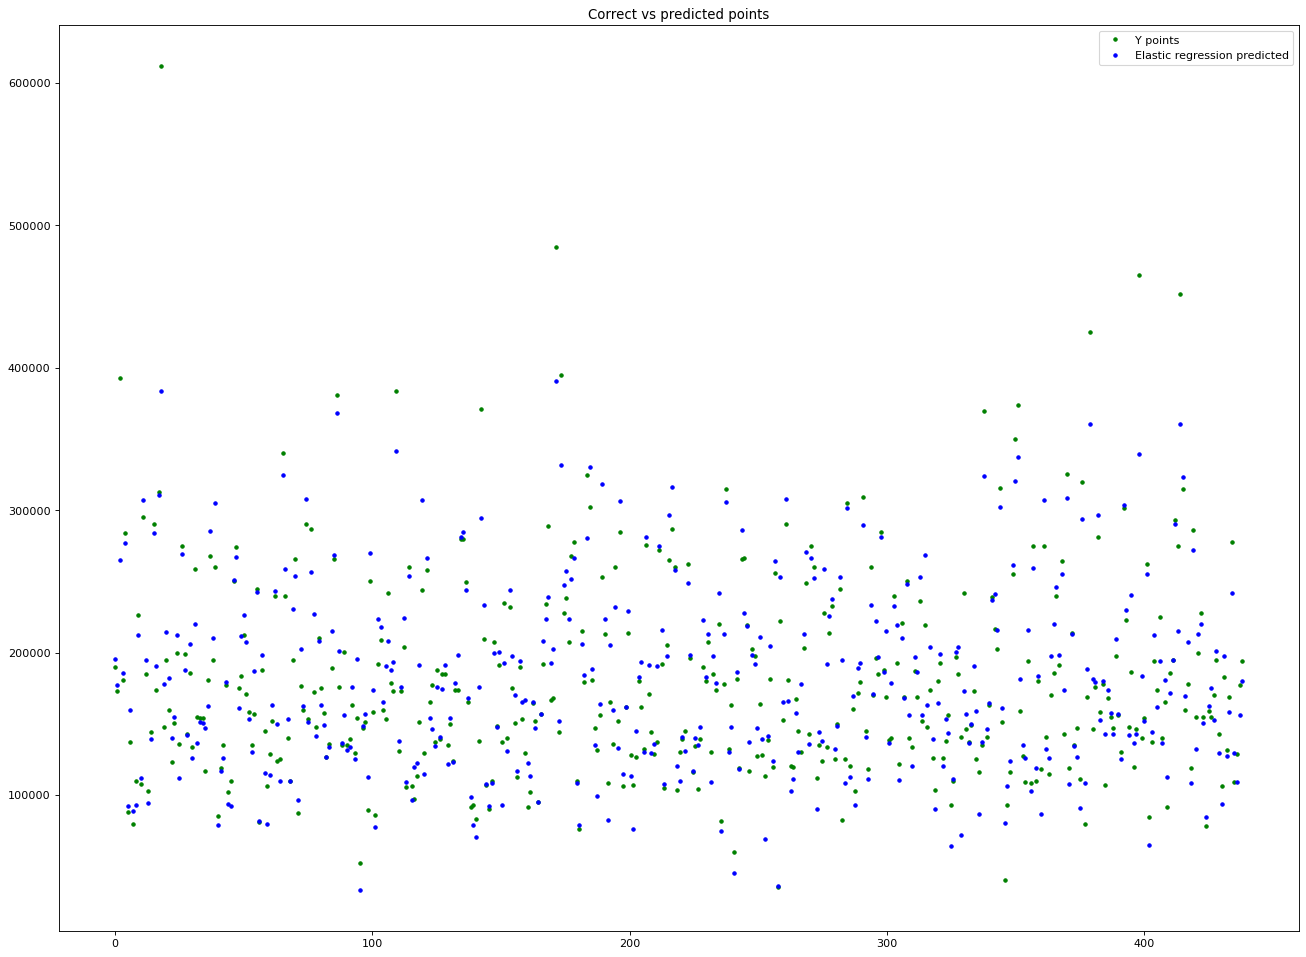

In [10]:
figure(figsize=(20, 15), dpi=80)
plt.title('Correct vs predicted points')
plt.plot(x_points, test_y_ohe, "g.", label='Y points')
plt.plot(x_points, elastic_reg_test, "b.", label='Elastic regression predicted')
plt.legend()
plt.show()